In [1]:
# ! pip install opencv-python


In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

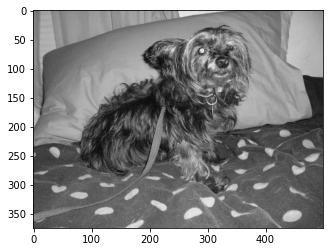

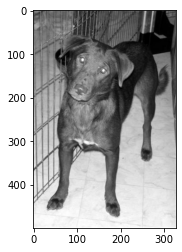

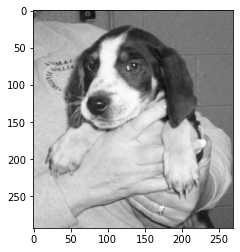

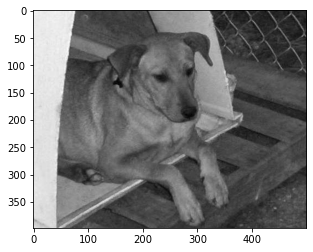

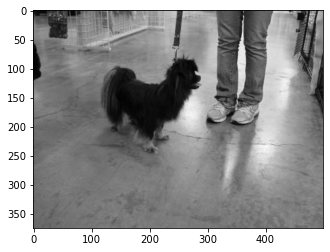

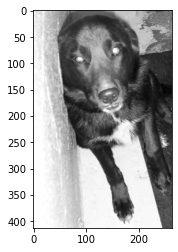

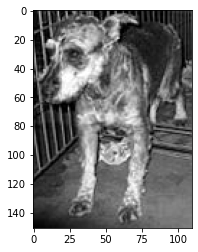

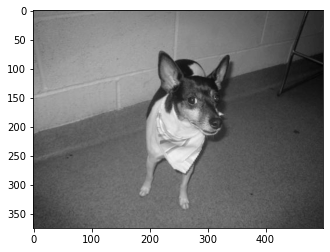

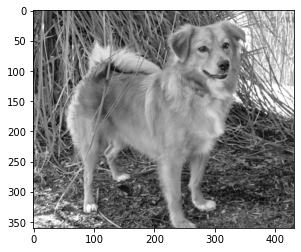

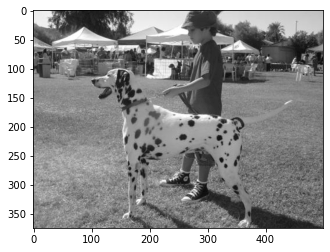

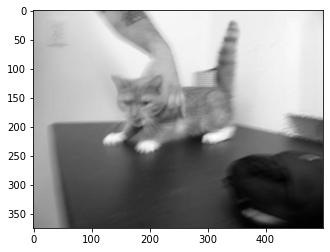

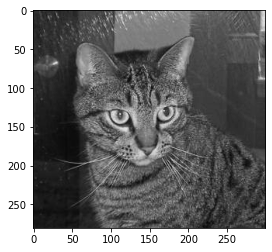

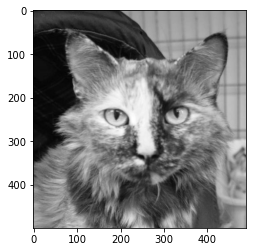

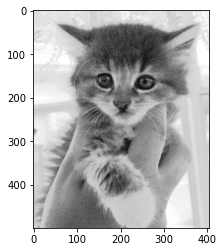

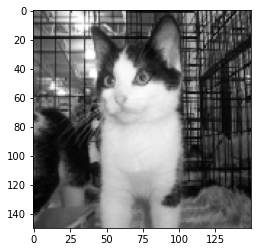

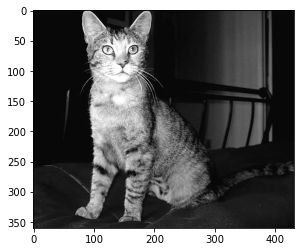

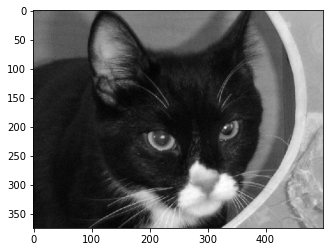

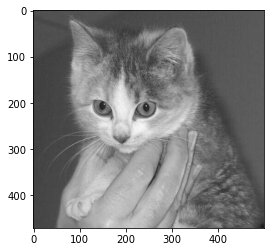

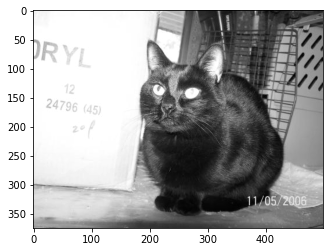

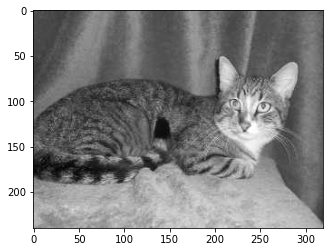

In [77]:

DATADIR = r'E:\iti\phase2\tensorflew\dataset\PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==10 : 
            break

In [78]:
print(img_array)
print(img_array.shape)

[[ 75  80  84 ...  91  86  85]
 [ 75  79  83 ...  90  89  91]
 [ 75  78  82 ...  83  87  91]
 ...
 [180 175 170 ... 158 160 162]
 [179 169 158 ... 164 164 163]
 [180 166 149 ... 168 165 161]]
(240, 320)


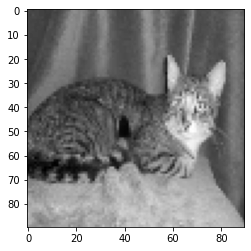

In [79]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 90

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [80]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [06:00<00:00, 34.63it/s]

24946


In [81]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
0
0
1
0
1


In [82]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[147]
   [144]
   [147]
   ...
   [101]
   [101]
   [ 97]]

  [[144]
   [136]
   [139]
   ...
   [ 97]
   [100]
   [102]]

  [[134]
   [137]
   [131]
   ...
   [100]
   [103]
   [ 97]]

  ...

  [[153]
   [156]
   [158]
   ...
   [101]
   [101]
   [114]]

  [[145]
   [159]
   [161]
   ...
   [115]
   [ 98]
   [107]]

  [[160]
   [152]
   [161]
   ...
   [101]
   [ 94]
   [100]]]]


In [83]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
y=np.array(y)

In [1]:
model.fit(X, y, epochs=3)


In [ ]:
test_loss, test_acc = model.evaluate(X,y)
test_acc